<h><font size=5>1. Data import and Understanding [10 Marks]
    
A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]
    
B. Check for missing values and print percentage for each attribute. [2 Marks]
    
C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]
    
D. Visualise distribution of the target variable. [2 Marks]
    
E. Share insights from the initial data analysis (at least 2). [2 Marks]</font></h>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
import random
seed = 7
np.random.seed(seed)
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore


In [2]:
mydata=pd.read_csv("NN Project Data - Signal.csv")
mydata.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [257]:
mydata.shape

(1599, 12)

In [258]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [259]:
null_counts=mydata.isnull().sum()
null_counts

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [260]:
null_counts*100/len(mydata)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [261]:
mydata.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [262]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Looking the 11 parameters : Parameter 3 ranges between 0 and 1. Maximum value of Parameter 5 is 0.6 Parameter 8 has a very low range between 0.9 and 1.004 Standard deviation is lowest for Parameter 8, it is 0.001887 'Signal_Strength' has classes as - 3.5, 4.0,5.0, 6.0, 7.0 and 7.5

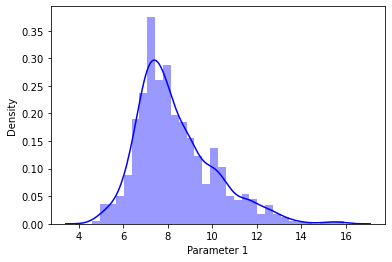

Distribution of  Parameter 1
Mean is: 8.319637273295838
Median is: 7.9
Mode is: 0    7.2
Name: Parameter 1, dtype: float64
Standard deviation is: 1.7410963181277006
Skewness is: 0.9827514413284587
Maximum is: 15.9
Minimum is: 4.6


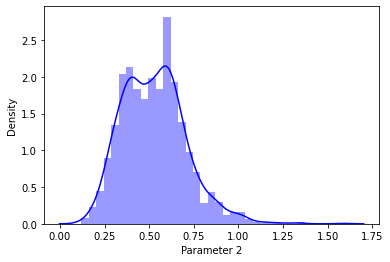

Distribution of  Parameter 2
Mean is: 0.5278205128205131
Median is: 0.52
Mode is: 0    0.6
Name: Parameter 2, dtype: float64
Standard deviation is: 0.17905970415353498
Skewness is: 0.6715925723840199
Maximum is: 1.58
Minimum is: 0.12


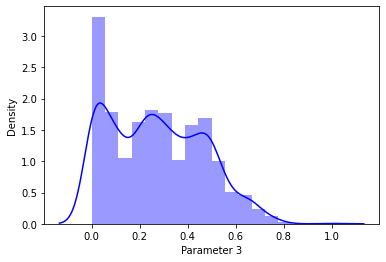

Distribution of  Parameter 3
Mean is: 0.2709756097560964
Median is: 0.26
Mode is: 0    0.0
Name: Parameter 3, dtype: float64
Standard deviation is: 0.19480113740531785
Skewness is: 0.3183372952546368
Maximum is: 1.0
Minimum is: 0.0


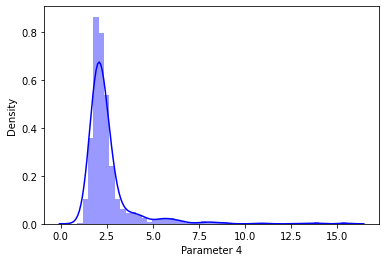

Distribution of  Parameter 4
Mean is: 2.5388055034396517
Median is: 2.2
Mode is: 0    2.0
Name: Parameter 4, dtype: float64
Standard deviation is: 1.4099280595072805
Skewness is: 4.54065542590319
Maximum is: 15.5
Minimum is: 0.9


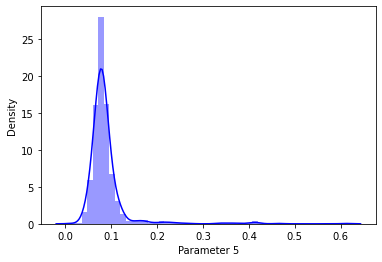

Distribution of  Parameter 5
Mean is: 0.08746654158849257
Median is: 0.079
Mode is: 0    0.08
Name: Parameter 5, dtype: float64
Standard deviation is: 0.047065302010090154
Skewness is: 5.680346571971724
Maximum is: 0.611
Minimum is: 0.012


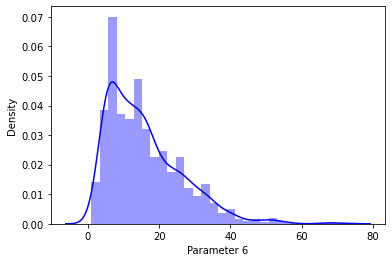

Distribution of  Parameter 6
Mean is: 15.874921826141339
Median is: 14.0
Mode is: 0    6.0
Name: Parameter 6, dtype: float64
Standard deviation is: 10.46015696980973
Skewness is: 1.250567293314441
Maximum is: 72.0
Minimum is: 1.0


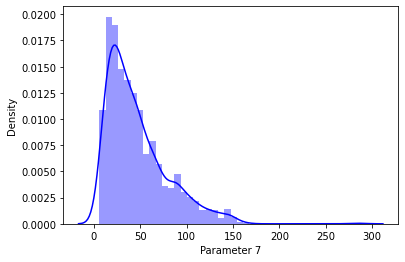

Distribution of  Parameter 7
Mean is: 46.46779237023139
Median is: 38.0
Mode is: 0    28.0
Name: Parameter 7, dtype: float64
Standard deviation is: 32.89532447829901
Skewness is: 1.515531257594554
Maximum is: 289.0
Minimum is: 6.0


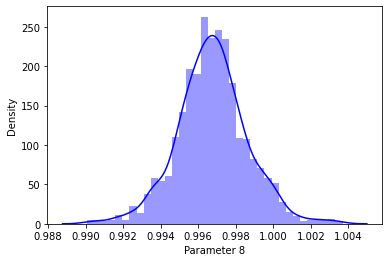

Distribution of  Parameter 8
Mean is: 0.9967466791744831
Median is: 0.99675
Mode is: 0    0.9972
Name: Parameter 8, dtype: float64
Standard deviation is: 0.0018873339538425559
Skewness is: 0.07128766294927483
Maximum is: 1.00369
Minimum is: 0.99007


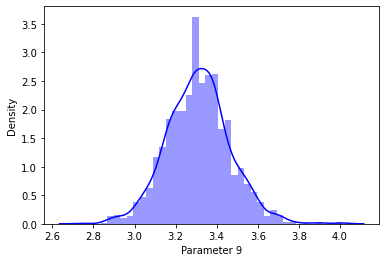

Distribution of  Parameter 9
Mean is: 3.311113195747343
Median is: 3.31
Mode is: 0    3.3
Name: Parameter 9, dtype: float64
Standard deviation is: 0.15438646490354266
Skewness is: 0.19368349811284427
Maximum is: 4.01
Minimum is: 2.74


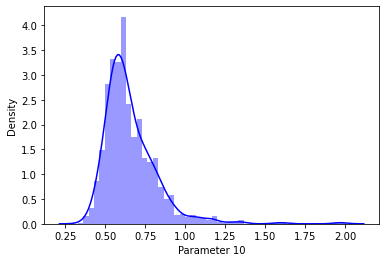

Distribution of  Parameter 10
Mean is: 0.6581488430268921
Median is: 0.62
Mode is: 0    0.6
Name: Parameter 10, dtype: float64
Standard deviation is: 0.16950697959010977
Skewness is: 2.4286723536602945
Maximum is: 2.0
Minimum is: 0.33


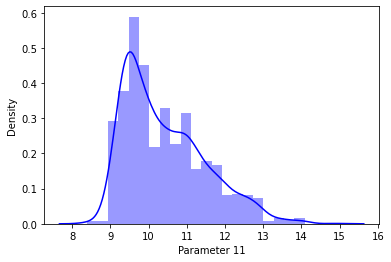

Distribution of  Parameter 11
Mean is: 10.422983114446502
Median is: 10.2
Mode is: 0    9.5
Name: Parameter 11, dtype: float64
Standard deviation is: 1.0656675818563965
Skewness is: 0.8608288069184189
Maximum is: 14.9
Minimum is: 8.4


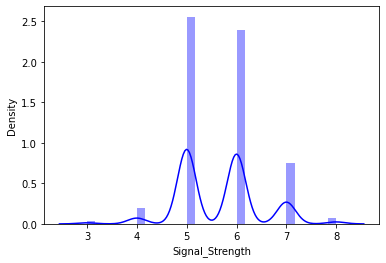

Distribution of  Signal_Strength
Mean is: 5.6360225140712945
Median is: 6.0
Mode is: 0    5
Name: Signal_Strength, dtype: int64
Standard deviation is: 0.8075694397347023
Skewness is: 0.21780157547366327
Maximum is: 8
Minimum is: 3


In [263]:
cols = list(mydata)
for i in np.arange(len(cols)):
    sns.distplot(mydata[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',mydata[cols[i]].mean())
    print('Median is:',mydata[cols[i]].median())
    print('Mode is:',mydata[cols[i]].mode())
    print('Standard deviation is:',mydata[cols[i]].std())
    print('Skewness is:',mydata[cols[i]].skew())
    print('Maximum is:',mydata[cols[i]].max())
    print('Minimum is:',mydata[cols[i]].min())

Mean, median and mode are almost overlapping or too close to each other ecept in Parameter 7 Parameter 3 is trimodal and Signal strength is a classification variable. All of them are positively skewed. Standard deviation is maximum for Parameter7, it is 32.895324478299074

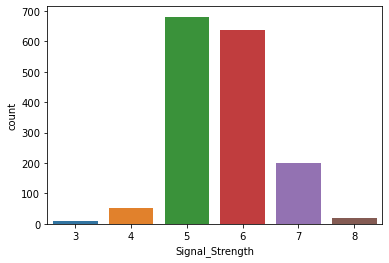

In [264]:
sns.countplot(mydata['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

In signal_strength the class 5 have highest signal strength.class 1 have lowest signal strength

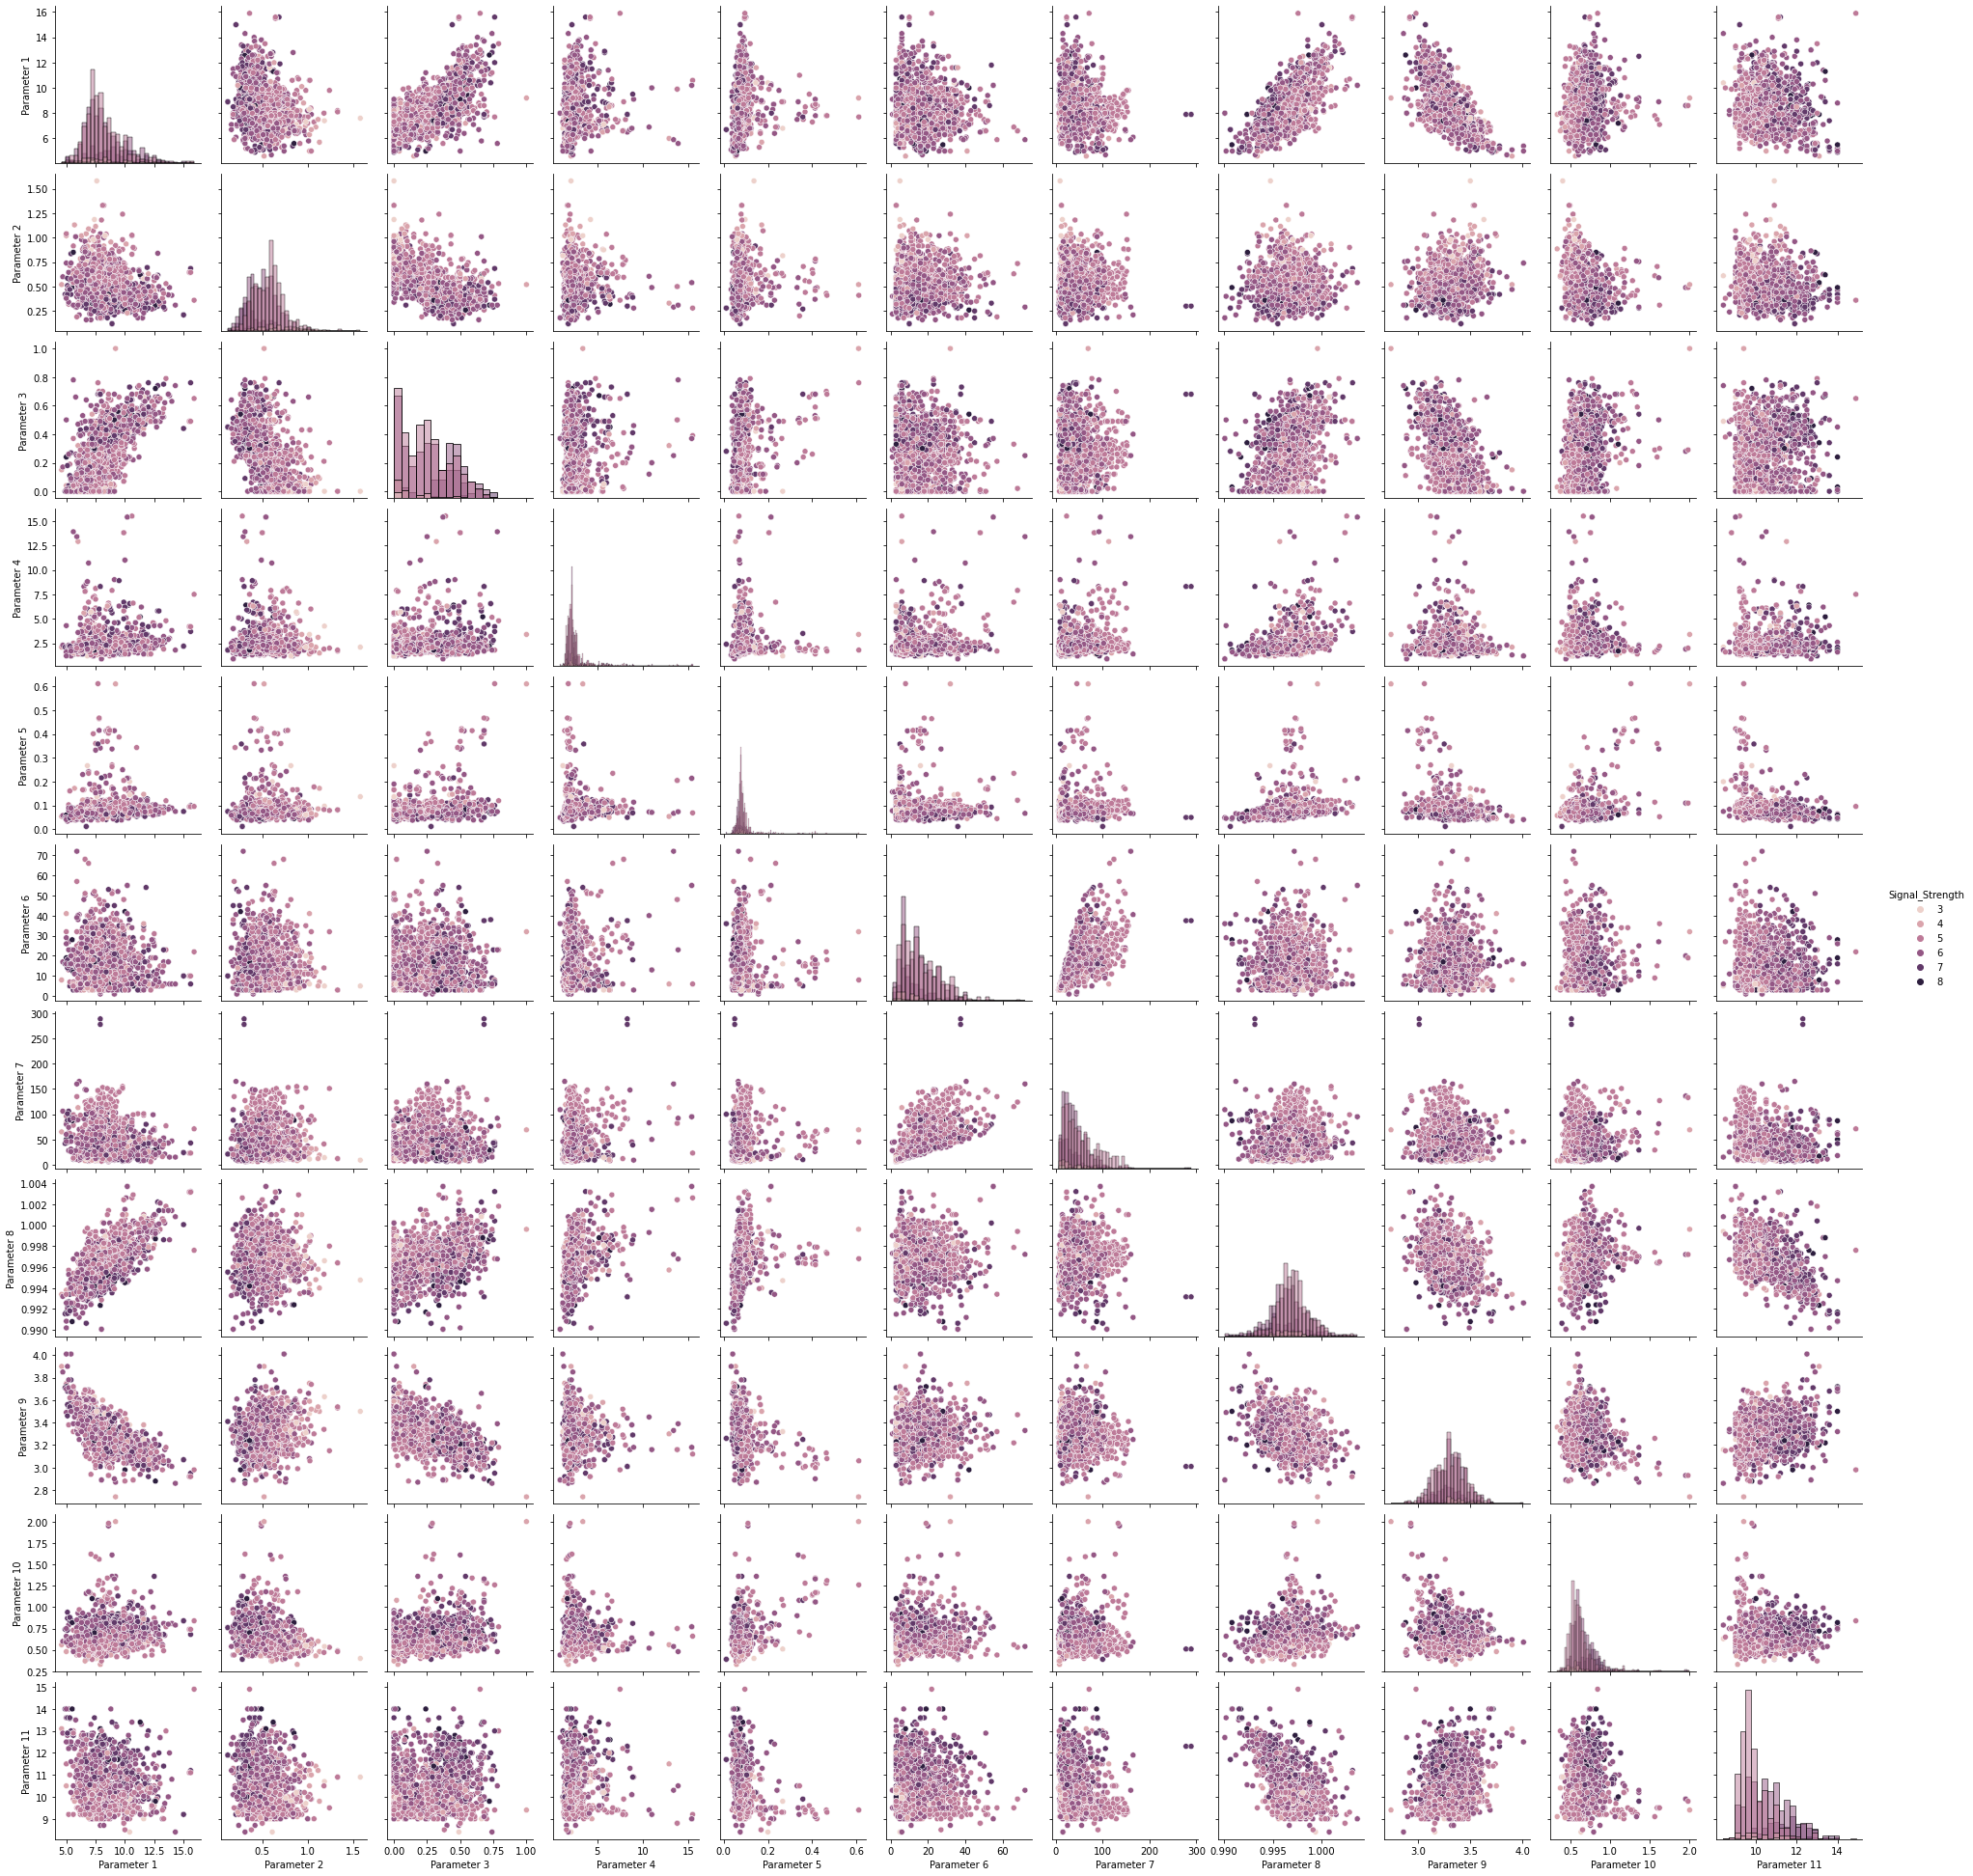

In [265]:
sns.pairplot(mydata,hue='Signal_Strength',diag_kind="hist")

<h>1.Parameter 6 and Parameter 7 are highly correlated with each other and visce versa and they have almost 0 correlation with other Parameters</h>

<h>2.Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9</h> 

<h>3.Parameter 4 is has very low correlation with other Parameters.</h>

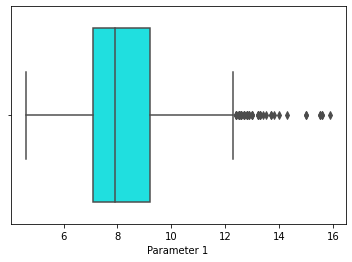

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1599  rows in data, number of outliers are: 49


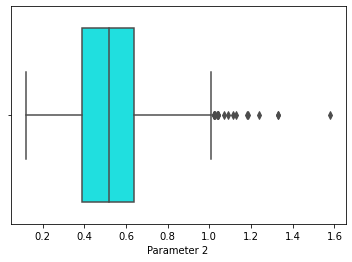

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1599  rows in data, number of outliers are: 19


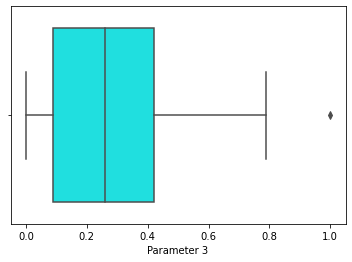

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Lower Whisker, Upper Whisker :  -0.4049999999999999 , 0.9149999999999999
Out of  1599  rows in data, number of outliers are: 1


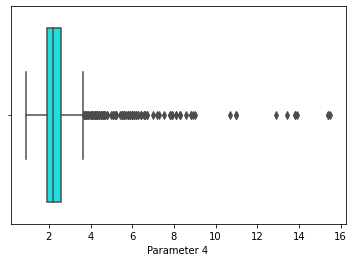

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1599  rows in data, number of outliers are: 155


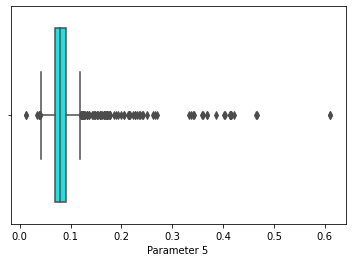

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
Lower Whisker, Upper Whisker :  0.04000000000000002 , 0.11999999999999998
Out of  1599  rows in data, number of outliers are: 112


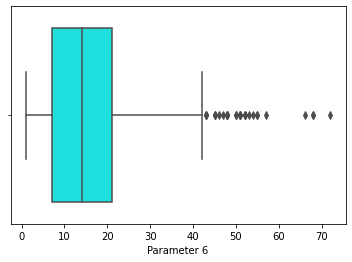

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1599  rows in data, number of outliers are: 30


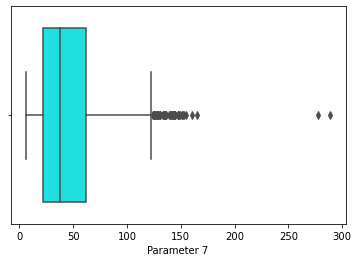

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
Lower Whisker, Upper Whisker :  -38.0 , 122.0
Out of  1599  rows in data, number of outliers are: 55


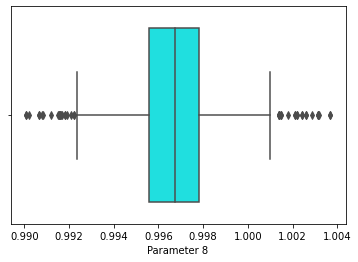

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.997835
IQR is: 0.002234999999999987
Lower Whisker, Upper Whisker :  0.9922475000000001 , 1.0011875
Out of  1599  rows in data, number of outliers are: 45


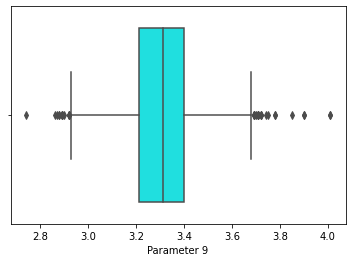

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1599  rows in data, number of outliers are: 35


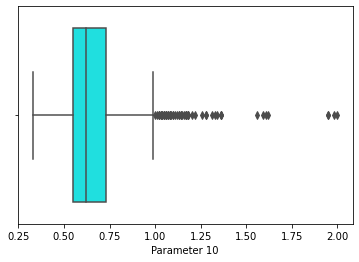

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1599  rows in data, number of outliers are: 59


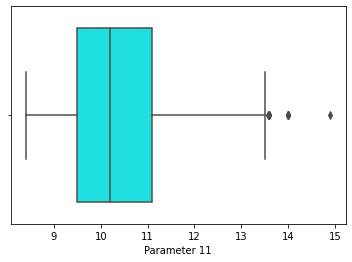

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1599  rows in data, number of outliers are: 13


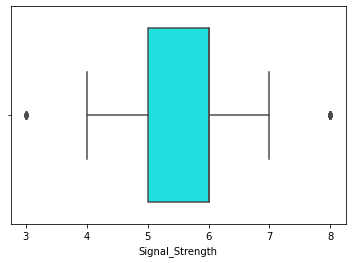

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1599  rows in data, number of outliers are: 28


In [266]:
# Checking the presence of outliers
l = len(mydata)
col = list(mydata.columns)
for i in np.arange(len(col)):
    sns.boxplot(x= mydata[col[i]], color='cyan')
    plt.show()
    print('Boxplot of ',col[i])
    Q1 = mydata[col[i]].quantile(0.25)
    Q2 = mydata[col[i]].quantile(0.50)
    Q3 = mydata[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (mydata[col[i]] < (Q1 - 1.5 *IQR)) |(mydata[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

Parameter 4 has the highest number of outliers which is 155.

Parameter 5 has 112 outliers.

In [267]:
#  function to treat outliers
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
   #print('cols=',cols)
   # print('IQR_list=',IQR_list)
   # print('lower_boundary_list=',lower_boundary_list)
   # print('upper_boundary_list=',upper_boundary_list)
   # print('outliers_count=',outliers_count)
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    #print('Data=',ndf)
    #print('Columns having outliers=',cols)
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [268]:
#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.
count,df=detect_treate_outliers(mydata,'update')
if count>0:
    print('Updating dataset')
    mydata=df

Updating dataset


<AxesSubplot:>

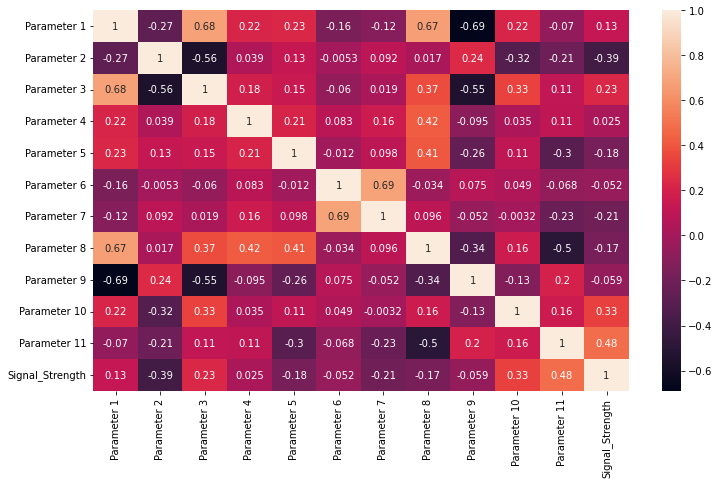

In [269]:
# studying correlation between the attributes
b_corr=mydata.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(b_corr,annot=True)

Since high correlation coefficient value lies between ± 0.50 and ± 1 Parameter 1 is highly correlated with Parameter 3 and Parameter 8, Parameter 9. Parameter 6 and 7 are highly correlated. But since, the correlation is not too high near 0.8 or above not dropping the features.

2.Data preprocessing [7 Marks]

A. Split the data into X & Y. [1 Marks]

B. Split the data into train & test with 70:30 proportion.[1 Marks]

C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]

D. Normalise the train and test data with appropriate method. [2 Marks]

E. Transform Labels into format acceptable by Neural Network [2 Marks]


In [270]:
X = mydata.drop("Signal_Strength", axis=1)
y = mydata['Signal_Strength']

In [271]:
from sklearn.model_selection import train_test_split

# splitting to create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=seed)

In [272]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1119.0,8.232440,1.642090,4.600000,7.10000,7.80000,9.100000,12.350000
Parameter 2,1119.0,0.529786,0.171794,0.120000,0.40000,0.53000,0.640000,1.015000
Parameter 3,1119.0,0.264057,0.192688,0.000000,0.09000,0.25000,0.420000,0.790000
Parameter 4,1119.0,2.331189,0.620416,1.200000,1.90000,2.20000,2.600000,3.650000
Parameter 5,1119.0,0.081286,0.017879,0.040000,0.07000,0.07900,0.090000,0.120000
Parameter 6,1119.0,15.876229,9.886141,1.000000,7.00000,14.00000,22.000000,42.000000
Parameter 7,1119.0,46.348525,30.457536,6.000000,23.00000,38.00000,63.000000,122.000000
Parameter 8,1119.0,0.996730,0.001804,0.992248,0.99559,0.99677,0.997835,1.001187
Parameter 9,1119.0,3.314191,0.151660,2.925000,3.21000,3.31000,3.405000,3.685000
Parameter 10,1119.0,0.647382,0.134399,0.390000,0.55000,0.62000,0.720000,1.000000


In [273]:
print('length of X_train:',X_train.shape)
print('length of y_train:',y_train.shape)
print('length of X_test:',X_test.shape)
print('length of y_test:',y_test.shape)


length of X_train: (1119, 11)
length of y_train: (1119,)
length of X_test: (480, 11)
length of y_test: (480,)


In [274]:
print('null values in X_train:\n',X_train.isnull().sum())
print('null values in y_train:\n',y_train.isnull().sum())
print('null values in X_test:\n',X_test.isnull().sum())
print('null values in y_test:\n',y_test.isnull().sum())

null values in X_train:
 Parameter 1     0
Parameter 2     0
Parameter 3     0
Parameter 4     0
Parameter 5     0
Parameter 6     0
Parameter 7     0
Parameter 8     0
Parameter 9     0
Parameter 10    0
Parameter 11    0
dtype: int64
null values in y_train:
 0
null values in X_test:
 Parameter 1     0
Parameter 2     0
Parameter 3     0
Parameter 4     0
Parameter 5     0
Parameter 6     0
Parameter 7     0
Parameter 8     0
Parameter 9     0
Parameter 10    0
Parameter 11    0
dtype: int64
null values in y_test:
 0


In [275]:
normalized_x_train = pd.DataFrame(
    StandardScaler().fit_transform(X_train),
    columns = X_train.columns
)


normalized_x_test = pd.DataFrame(
    StandardScaler().fit_transform(X_test),
    columns = X_test.columns
)


In [276]:
normalized_x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1119.0,1.142964e-16,1.000447,-2.213072,-0.689941,-0.263465,0.528563,2.508633
Parameter 2,1119.0,-1.780921e-16,1.000447,-2.386404,-0.755812,0.001249,0.641839,2.825668
Parameter 3,1119.0,-1.535858e-16,1.000447,-1.371001,-0.903716,-0.072986,0.809665,2.730727
Parameter 4,1119.0,3.899175e-16,1.000447,-1.824089,-0.695310,-0.211547,0.433470,2.126638
Parameter 5,1119.0,6.891022e-16,1.000447,-2.310207,-0.631520,-0.127914,0.487604,2.166291
Parameter 6,1119.0,-1.795803e-17,1.000447,-1.505429,-0.898247,-0.189869,0.619707,2.643645
Parameter 7,1119.0,1.419156e-16,1.000447,-1.325339,-0.766935,-0.274226,0.546956,2.484945
Parameter 8,1119.0,5.951371e-14,1.000447,-2.485138,-0.631975,0.022246,0.612708,2.471416
Parameter 9,1119.0,-7.065642e-16,1.000447,-2.567349,-0.687311,-0.027648,0.599031,2.446087
Parameter 10,1119.0,-5.614613e-16,1.000447,-1.915917,-0.724897,-0.203825,0.540563,2.624849


In [277]:
# splitting to create training and validation data
X_vtrain, X_val, y_vtrain, y_val = train_test_split(normalized_x_train, y_train, test_size=.20, random_state=seed)

In [278]:
X_vtrain.shape

(895, 11)

In [279]:
# Initialize Sequential model
model_reg = tf.keras.models.Sequential()

# Normalize input data
model_reg.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg.add(tf.keras.layers.Dense(1))

In [280]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_reg.compile(optimizer='sgd', loss='mse')

In [281]:
model_reg.fit(X_vtrain, y_vtrain, validation_data=(X_val,y_val),epochs=100, batch_size=10)

Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 4.3546 - val_loss: 0.6903
Epoch 2/100
90/90 [==============================] - 0s 1ms/step - loss: 0.6912 - val_loss: 0.4803
Epoch 3/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5621 - val_loss: 0.4030
Epoch 4/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5166 - val_loss: 0.3810
Epoch 5/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5014 - val_loss: 0.3740
Epoch 6/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4701 - val_loss: 0.3615
Epoch 7/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4679 - val_loss: 0.3721
Epoch 8/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4537 - val_loss: 0.3563
Epoch 9/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4669 - val_loss: 0.3597
Epoch 10/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4433 - val_loss: 0.3678
Epoch 11/

90/90 [==============================] - 0s 1ms/step - loss: 0.4425 - val_loss: 0.3486
Epoch 84/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4353 - val_loss: 0.3685
Epoch 85/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4417 - val_loss: 0.4128
Epoch 86/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4280 - val_loss: 0.3505
Epoch 87/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4432 - val_loss: 0.3759
Epoch 88/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4241 - val_loss: 0.3595
Epoch 89/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4423 - val_loss: 0.3575
Epoch 90/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4511 - val_loss: 0.3604
Epoch 91/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4358 - val_loss: 0.3680
Epoch 92/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4421 - val_loss: 0.3575
Epoch 93/100


In [282]:
# save the model
model_reg.save("model_reg.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [283]:
from tensorflow.keras.models import load_model
# load the model
model_rr = load_model('model_reg.h5')

In [284]:
y_pred = model_rr.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [285]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[5.713826]
[7.570779]
[7.1961946]
[4.366572]
[5.418931]


In [286]:
print(y_test.head())

1526    6.0
674     6.0
1508    6.0
58      5.0
1351    6.0
Name: Signal_Strength, dtype: float64


The first 5 elements of y_pred and y_test are close.

In [287]:
from sklearn.metrics import r2_score
score_r = r2_score(y_test,y_pred)
print(score_r)

-10.41173103556692


In [288]:
#summary of regression model
model_rr.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_33 (Bat  (None, 11)               44        
 chNormalization)                                                
                                                                 
 dense_270 (Dense)           (None, 1)                 12        
                                                                 
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


The need is to build a classifier which can use these parameters to determine the signal strength or quality

In [289]:
# counting the number of classes in output
mydata['Signal_Strength'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
7.5     18
3.5     10
Name: Signal_Strength, dtype: int64

In [290]:
X.shape

(1599, 11)

In [291]:
y.shape

(1599,)

In [292]:
yc = to_categorical(y, num_classes=8)

In [293]:
# splitting data for test of categorial 
Xcv_train, Xc_test, ycv_train, yc_test = train_test_split(X, yc, test_size=.30, random_state=seed)

In [294]:
print("Shape of y_train:", ycv_train.shape)
print("One value of y_train:", ycv_train[0])

Shape of y_train: (1119, 8)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 1.]


In [295]:
# splitting data for  train and validation of categorial 
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xcv_train, ycv_train, test_size=.20, random_state=seed)

In [296]:
print("Shape of y_train:", ycv_train.shape)
print("One value of y_train:", ycv_train[0])

Shape of y_train: (1119, 8)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 1.]


In [297]:
model_class = Sequential()
model_class.add(Dense(11, activation='relu'))
model_class.add(Dense(8, activation='relu'))
model_class.add(Dense(8, activation='softmax'))

In [298]:
# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_class.fit(x=Xcv_train, y=ycv_train, batch_size=20, epochs=100, validation_data=(Xc_val, yc_val))

Epoch 1/100
56/56 [==============================] - 0s 3ms/step - loss: 1.5535 - accuracy: 0.4343 - val_loss: 1.1087 - val_accuracy: 0.5625
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 1.2116 - accuracy: 0.4853 - val_loss: 1.0173 - val_accuracy: 0.5312
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 1.1675 - accuracy: 0.4844 - val_loss: 0.9979 - val_accuracy: 0.5491
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 1.1328 - accuracy: 0.4888 - val_loss: 1.0579 - val_accuracy: 0.5446
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 1.1189 - accuracy: 0.4915 - val_loss: 0.9681 - val_accuracy: 0.5357
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 1.1120 - accuracy: 0.4701 - val_loss: 0.9909 - val_accuracy: 0.5357
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 1.1096 - accuracy: 0.4942 - val_loss: 0.9754 - val_accuracy: 0.5312
Epoch 8/100
5

Epoch 59/100
56/56 [==============================] - 0s 1ms/step - loss: 1.0573 - accuracy: 0.5192 - val_loss: 0.9202 - val_accuracy: 0.5580
Epoch 60/100
56/56 [==============================] - 0s 1ms/step - loss: 1.0516 - accuracy: 0.5326 - val_loss: 0.9197 - val_accuracy: 0.5893
Epoch 61/100
56/56 [==============================] - 0s 2ms/step - loss: 1.0521 - accuracy: 0.5139 - val_loss: 0.9730 - val_accuracy: 0.5491
Epoch 62/100
56/56 [==============================] - 0s 2ms/step - loss: 1.0548 - accuracy: 0.5174 - val_loss: 0.9407 - val_accuracy: 0.5982
Epoch 63/100
56/56 [==============================] - 0s 1ms/step - loss: 1.0552 - accuracy: 0.5112 - val_loss: 0.9333 - val_accuracy: 0.5714
Epoch 64/100
56/56 [==============================] - 0s 1ms/step - loss: 1.0491 - accuracy: 0.5174 - val_loss: 0.9257 - val_accuracy: 0.5536
Epoch 65/100
56/56 [==============================] - 0s 1ms/step - loss: 1.0452 - accuracy: 0.5326 - val_loss: 0.9311 - val_accuracy: 0.5938
Epoch 

In [299]:
print("Shape of y_train:", yc_train.shape)
print("One value of y_train:", yc_train[0])

Shape of y_train: (895, 8)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0.]


In [300]:
model_class = Sequential()
model_class.add(Dense(11, activation='relu'))
model_class.add(Dense(8, activation='relu'))
model_class.add(Dense(8, activation='softmax'))

In [301]:
# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_class.fit(x=Xc_train, y=yc_train, batch_size=20, epochs=100, validation_data=(Xc_val, yc_val))

Epoch 1/100
45/45 [==============================] - 0s 4ms/step - loss: 1.8394 - accuracy: 0.3989 - val_loss: 1.0737 - val_accuracy: 0.4821
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 1.2014 - accuracy: 0.4413 - val_loss: 1.0830 - val_accuracy: 0.4866
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 1.2131 - accuracy: 0.4358 - val_loss: 1.0354 - val_accuracy: 0.5089
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1738 - accuracy: 0.4559 - val_loss: 1.0395 - val_accuracy: 0.5134
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1676 - accuracy: 0.4514 - val_loss: 1.1113 - val_accuracy: 0.5045
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1637 - accuracy: 0.4670 - val_loss: 1.0374 - val_accuracy: 0.5000
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1449 - accuracy: 0.4626 - val_loss: 1.0616 - val_accuracy: 0.5089
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1145 - accuracy: 0.4838 - val_loss: 0.9810 - val_accuracy: 0.5268
Epoch 60/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1249 - accuracy: 0.4838 - val_loss: 0.9728 - val_accuracy: 0.5759
Epoch 61/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1190 - accuracy: 0.4804 - val_loss: 0.9650 - val_accuracy: 0.5536
Epoch 62/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1212 - accuracy: 0.4771 - val_loss: 0.9823 - val_accuracy: 0.5714
Epoch 63/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1260 - accuracy: 0.4726 - val_loss: 0.9743 - val_accuracy: 0.5223
Epoch 64/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1136 - accuracy: 0.4939 - val_loss: 0.9815 - val_accuracy: 0.5536
Epoch 65/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1209 - accuracy: 0.4782 - val_loss: 0.9780 - val_accuracy: 0.5357
Epoch 

Pickle the model for future use.

In [302]:
# save the model
model_class.save("model_class.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [303]:
# load the model
model_cl = load_model('model_class.h5')

In [304]:
# calculate score of training data
score = model_cl.evaluate(Xc_train, yc_train, verbose=0)
print(score)

[1.1143766641616821, 0.49162012338638306]


In [305]:
# score of test data
score_t = model_cl.evaluate(Xc_test, yc_test, verbose=0)
print( score_t)

[1.1186268329620361, 0.49791666865348816]


In [306]:
#summary of classification model
model_cl.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_274 (Dense)           (None, 11)                132       
                                                                 
 dense_275 (Dense)           (None, 8)                 96        
                                                                 
 dense_276 (Dense)           (None, 8)                 72        
                                                                 
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


<h><font size=5>PART B</font></h>

Data Import and Exploration [5 Marks]

A. Read the .h5 file and assign to a variable. [2 Marks]

B. Print all the keys from the .h5 file. [1 Marks]

C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

In [307]:
import numpy as np
import pandas as pd
#Importing Libraries
import tensorflow
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
import math

%matplotlib inline
tensorflow.__version__

'2.9.1'

In [308]:
h5f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','r')


In [309]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [310]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

Data Visualisation and preprocessing [13 Marks]

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

E. Transform Labels into format acceptable by Neural Network [2 Marks]

F. Print total Number of classes in the Dataset. [1 Marks]

In [311]:
print(f'Size of X_train is {X_train.shape}')
print(f'Size of y_train is {y_train.shape}\n')

print(f'Size of X_val is {X_val.shape}')
print(f'Size of y_val is {y_val.shape}\n')

print(f'Size of X_test is {X_test.shape}')
print(f'Size of y_test is {y_test.shape}')

Size of X_train is (42000, 32, 32)
Size of y_train is (42000,)

Size of X_val is (60000, 32, 32)
Size of y_val is (60000,)

Size of X_test is (18000, 32, 32)
Size of y_test is (18000,)


The training dataset(X_train) has 42k records on which we can train upon of matrix size of 32x32 i.e. image size of 32x32.


The test dataset(X_test) has 18k records each record being 32x32 in size.


y_train, y_test contain label for the given image matrix.

Label for the image is 6


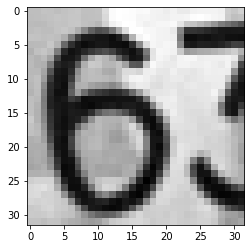

In [312]:
plt.imshow(X_train[1],cmap='gray')
print(f'Label for the image is {y_train[1]}')

We can clearly see that we have a partial view of digit 3, that is Noise

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


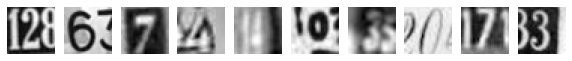

In [313]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % ((y_train[i])))
plt.show()

thus we can conclude there are lots of noise in data images

****Step 2 : Reshape and normalize the train and test features****

****reshape****

In [314]:
# RESHAPE 2D - 32*32 into 1D - 1024
X_train = X_train.reshape(42000, 32*32)
X_val= X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0],32*32)

print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of X_val is {X_val.shape}')
print(f'Shape of X_test is {X_test.shape}')

Shape of X_train is (42000, 1024)
Shape of X_val is (60000, 1024)
Shape of X_test is (18000, 1024)


****Normalize the values****

In [315]:
print(f'Min value for Train = {X_train.min()},Validation ={X_val.min()}, Test = {X_test.min()} ')
print(f'Min value for Train = {X_train.max()},Validation ={X_val.max()}, Test = {X_test.max()} ')

Min value for Train = 0.0,Validation =0.0, Test = 0.0 
Min value for Train = 254.97450256347656,Validation =254.97450256347656, Test = 254.97450256347656 


In [316]:
print('Before Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}\n')
maxVal=X_train.max()
X_train = X_train/maxVal
X_val= X_val/maxVal
X_test = X_test/maxVal

print('After Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

Before Normalization
Min value is 0.0
Max value is 254.97450256347656

After Normalization
Min value is 0.0
Max value is 1.0


***Step 3 : One hot encode the labels for train and test data***

In [317]:
print(f'Sample value before one hot encode {y_train[0]}\n')
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_val= tensorflow.keras.utils.to_categorical(y_val,num_classes=10)
y_test= tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(f'Sample value after one hot encode {y_train[0]}')

Sample value before one hot encode 2

Sample value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Label for image at index 1 is 2
Label for image at index 2 is 6
Label for image at index 3 is 7
Label for image at index 4 is 4
Label for image at index 5 is 4
Label for image at index 6 is 0
Label for image at index 7 is 3
Label for image at index 8 is 0
Label for image at index 9 is 7
Label for image at index 10 is 3


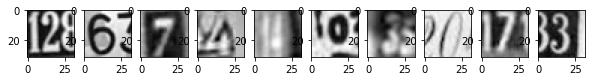

In [318]:
#cross check if we did all right
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'Label for image at index {i+1} is {np.argmax(y_train[0:10][i])}')

Model Training & Evaluation using Neural Network [12 Marks]

A. Design a Neural Network to train a classifier. [3 Marks]

B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]

C. Evaluate performance of the model with appropriate metrics. [2 Marks]

D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. [4 Marks

****Step 4 Model Creations****

****Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax****

In [319]:
def model(iterations, lr, Lambda, verb=0, eval_test=False):
    scores=[]
    learning_rate=lr
    hidden_nodes=256
    output_nodes=10
    iterations=iterations
    # For early stopping of model.
    callbacks=tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    #model
    model = Sequential()
    model.add(Dense(500, input_shape=(1024,), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    # adam optmizer with custom learning rate
    adam= optimizers.Adam(lr=learning_rate)
    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    #Fit the model
    model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=iterations,
              batch_size=500, verbose=verb, callbacks=[callbacks])
    
    if eval_test == True:
        score = model.evaluate(X_train,y_train, verbose=0)
        scores.append(score)
        score = model.evaluate(X_val,y_val, verbose=0)
        scores.append(score)
        score = model.evaluate(X_test,y_test, verbose=0)
        scores.append(score)
        return scores
    else:
        score = model.evaluate(X_val,y_val, verbose=(verb+1)%2)
        return score

In [320]:
iterations = 1
lr=0.0001
Lambda=0
score=model(iterations, lr, Lambda)
print(f'\nLoss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 7s 4ms/step - loss: 2.2965 - accuracy: 0.1381

Loss is 2.2965054512023926 and Accuracy is 0.13813333213329315


Loss is pretty resonable and so is the accuracy which is probability of being a certain digit among 10 classes is 10%(equal for all classes).

Loss is here calculated via the softmax and crossentropy which is basically -y.ln(0.10) .

Lets try Increasing learning Rate, that should increase our loss, this will act as cross validation

In [321]:
#let's narrow down our search a bit
iterations = 50
lr=1e-4
Lambda=1e-7
score=model(iterations, lr, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4792 - accuracy: 0.8575
Loss is 0.47916221618652344 and Accuracy is 0.8574833273887634


loss is less and accuracy is 84.35

****Step 4 Hyperparameter Tunning¶****

In [322]:
#let's narrow down our search a bit
iterations = 50
lr=1e-4
Lambda=1e-7
score=model(iterations, lr, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4750 - accuracy: 0.8518
Loss is 0.47504639625549316 and Accuracy is 0.8518499732017517


In [323]:
iterations = 10
lr=2
Lambda=1e-2
score=model(iterations, lr, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 6s 3ms/step - loss: 12490.0088 - accuracy: 0.1000
Loss is 12490.0087890625 and Accuracy is 0.10000000149011612


In [324]:
import math
results =[]
for i in range(10):
    lr=math.pow(10, np.random.uniform(-4.0,1.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    iterations = 30
    score=model(iterations, lr, Lambda)
    result=f'Loss is {score[0]} and Accuracy is {score[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append(result)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.6063 - accuracy: 0.8120
Loss is 0.6063184142112732 and Accuracy is 0.8120166659355164 with learing rate 0.00024073622545708016 and Lambda 0.0007935859334260502

1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.1000
Loss is 2.302816152572632 and Accuracy is 0.10000000149011612 with learing rate 0.015561310098067912 and Lambda 0.00041431045159161256

1875/1875 [==============================] - 7s 3ms/step - loss: 124061925507072.0000 - accuracy: 0.1000
Loss is 124061925507072.0 and Accuracy is 0.10000000149011612 with learing rate 7.761533923098798 and Lambda 4.925829235993477e-05

1875/1875 [==============================] - 7s 3ms/step - loss: 2.3043 - accuracy: 0.1000
Loss is 2.3042614459991455 and Accuracy is 0.10000000149011612 with learing rate 0.03203334700471458 and Lambda 2.2922166711328954e-07

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6327 - accurac

In [325]:
import math
results =[]
for i in range(20):
    lr=math.pow(10, np.random.uniform(-4.0,-2.0))
    Lambda = math.pow(10, np.random.uniform(-5,-3))
    iterations = 50
    score=model(iterations, lr, Lambda)
    result=f'Loss is {score[0]} and Accuracy is {score[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append([result,[score[0],score[1],lr,Lambda]])

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5842 - accuracy: 0.8244
Loss is 0.5841929316520691 and Accuracy is 0.8243833184242249 with learing rate 0.0015889046459932454 and Lambda 0.0007948020906836664

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7643 - accuracy: 0.7746
Loss is 0.7643049359321594 and Accuracy is 0.7746000289916992 with learing rate 0.00028880569842215447 and Lambda 0.00012502009899977197

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7413 - accuracy: 0.7793
Loss is 0.7412698864936829 and Accuracy is 0.7793333530426025 with learing rate 0.00658046751858669 and Lambda 1.8464556955820417e-05

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6620 - accuracy: 0.8071
Loss is 0.661997377872467 and Accuracy is 0.8070999979972839 with learing rate 0.001113846030209053 and Lambda 0.0003168252003710074

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7244 - accuracy: 0.7880
Lo

In [326]:
lr= 0.001798
Lambda= 0.000878
iterations = 100 #Since we have used early stopping so it will halt 
eval_test= True
scores = model(iterations, lr, Lambda,verb=0, eval_test=True)

In [327]:
print(f'Training Dataset Loss is {scores[0][0]} Accuracy is {scores[0][1]}\n')
print(f'Validation Dataset Loss is {scores[1][0]} Accuracy is {scores[1][1]}\n')
print(f'Test Dataset Loss is {scores[2][0]} Accuracy is {scores[2][1]}\n')

Training Dataset Loss is 0.2862858176231384 Accuracy is 0.9111190438270569

Validation Dataset Loss is 0.39968958497047424 Accuracy is 0.8874666690826416

Test Dataset Loss is 0.6642979979515076 Accuracy is 0.832277774810791

